<a href="https://colab.research.google.com/github/Cindy-eng/AI-Data-Engineer--Assignments/blob/master/10_Mt_Fuji_Shimoyama_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

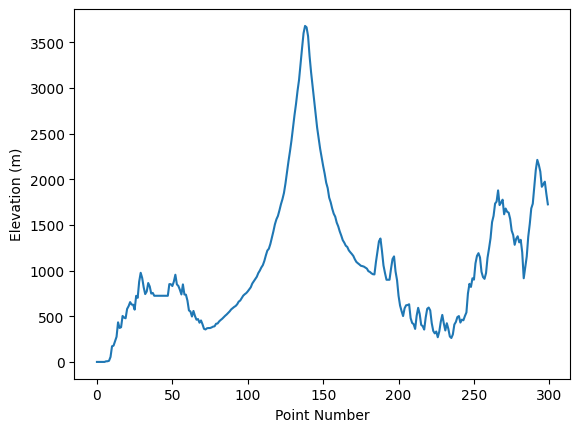

In [4]:
#Problem 1: Data Visualization
import numpy as np
import matplotlib.pyplot as plt

csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

points=fuji[:,0];
elevation=fuji[:,3]

fig, ax = plt.subplots();
ax.plot(points,elevation);
plt.xlabel("Point Number")
plt.ylabel("Elevation (m)")
plt.show();

In [3]:
#Problem 2: Create a function to calculate the slope of a certain pointf

def found_slope(fuji,points):
  if points == 0:
    return 0
  return (fuji[points, 3] - fuji[points - 1, 3]) / (fuji[points, 0] - fuji[points - 1, 0])

print('Result ',found_slope(fuji,136))

Result  168.35000000000036


In [4]:
#Problem 3: Create a function to calculate the destination point

def next_point(fuji,current_point,alph=0.2):
  slope=found_slope(fuji,current_point);
  next=current_point-alph*slope
  return next
print(next_point(fuji, 136))

102.32999999999993


In [10]:
#Problem 4: Create a function to go down the mountain

def calculate_slope(fuji, point):
    if point == 0:
        return 0
    return (fuji[point, 3] - fuji[point - 1, 3]) / (point - (point - 1))

def next_point(fuji, point, alpha=0.2):
    slope = calculate_slope(fuji, point)
    new_point = int(round(point - alpha * slope))
    #new_point = max(0, min(new_point, len(fuji) - 1))
    return new_point

def descend_mountain(fuji, start_point, alpha=0.2):
    path = [start_point]
    while True:
        next_p = next_point(fuji, path[-1], alpha)
        if next_p == path[-1]:
            break
        path.append(next_p)
    return path


path = descend_mountain(fuji, 136)
print(path)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


<ipython-input-8-23f5959d7669>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


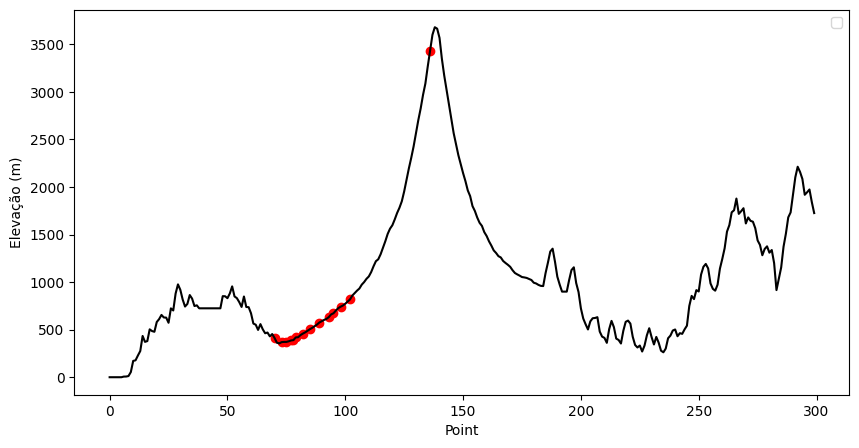

In [8]:
#【Question 5】Visualization of the descent process

plt.figure(figsize=(10, 5))
plt.plot(fuji[:, 3], linestyle='-', color='black')
plt.scatter(path, fuji[path, 3], color='red')
plt.xlabel("Point")
plt.ylabel("Elevação (m)")
plt.legend()
plt.show()

In [6]:
#[Problem 6] Change of initial value
def calculate_slope(fuji, point):
  if point == 0:
    return 0
  return (fuji[point, 3] - fuji[point - 1, 3]) / (point - (point - 1))

def next_point(fuji, point, alpha=0.2):
  slope = calculate_slope(fuji, point)
  new_point = int(round(point - alpha * slope))
  new_point = max(0, min(new_point, len(fuji) - 1))
  return new_point

def descend_mountain(fuji, start_point, alpha=0.2):
  path = [start_point]
  while True:
    next_p = next_point(fuji, path[-1], alpha)
    if next_p == path[-1]:
      path.append(next_p)
    return path

for start in [50, 100, 136, 200]:
  path = descend_mountain(fuji, start)
  print(f"Initial Point: {start}, path taken: {path}")

Initial Point: 50, path taken: [50]
Initial Point: 100, path taken: [100]
Initial Point: 136, path taken: [136]
Initial Point: 200, path taken: [200]


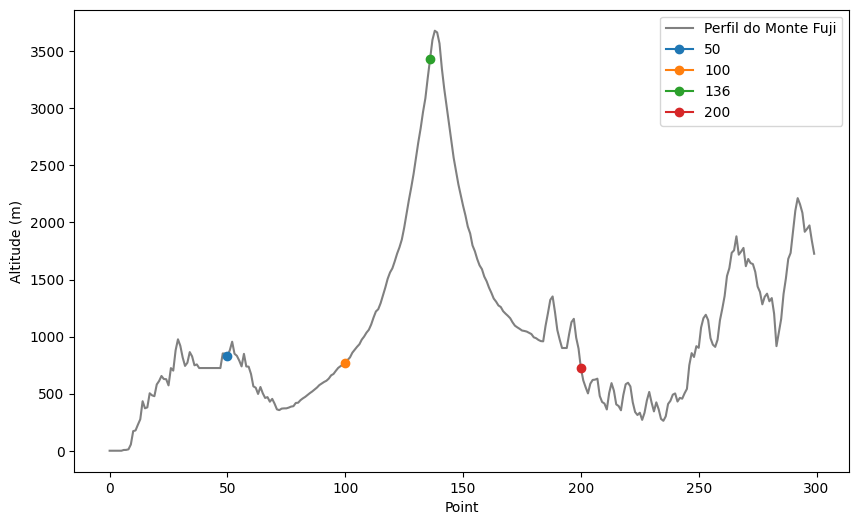

In [8]:
#[Problem 7] Visualization of the descent process for each initial value

start_points = [50, 100, 136, 200]
plt.figure(figsize=(10, 6))
plt.plot(fuji[:, 3], label="Perfil do Monte Fuji", color='gray')

for start in start_points:
    path = descend_mountain(fuji, start)
    elevations = [fuji[p, 3] for p in path]
    plt.plot(path, elevations, marker='o', label=f"{start}")

plt.xlabel("Point")
plt.ylabel("Altitude (m)")
plt.legend()
plt.show()

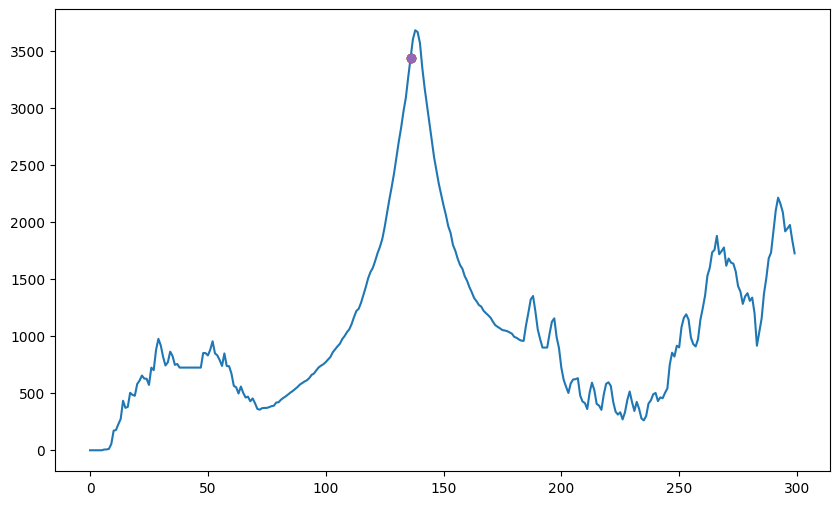

In [9]:
#[Problem 8] (Advance problem) Hyperparameter changes
alphas = [0.1, 0.2, 0.5, 1.0]

plt.figure(figsize=(10, 6))
plt.plot(fuji[:, 3])

for alpha in alphas:
    path = descend_mountain(fuji, 136, alpha=alpha)
    elevations = [fuji[p, 3] for p in path]
    plt.plot(path, elevations, marker='o', label=f"α = {alpha}")
plt.show()